<a href="https://colab.research.google.com/github/jq2412/week6/blob/main/week6hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed

GS
<class 'pandas.core.frame.DataFrame'>
[[-0.01169352]
 [ 0.01023403]
 [ 0.00658279]
 ...
 [-0.00065848]
 [ 0.01305341]
 [-0.00820808]]
1.9578428523944837


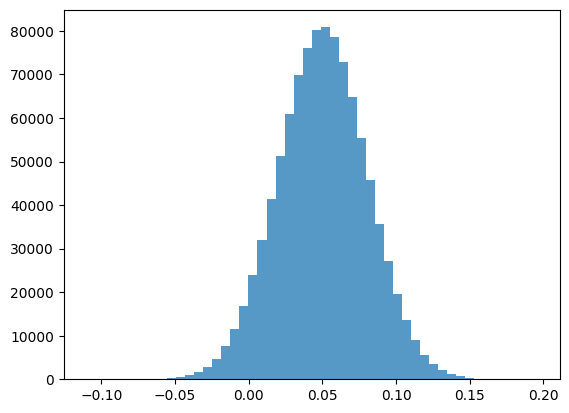

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

True
ES with confidence: True
ES with VaR: True
[[-0.01169352]
 [ 0.01023403]
 [ 0.00658279]
 ...
 [-0.00065848]
 [ 0.01305341]
 [-0.00820808]]
99% VaR for GS on a $1MM investment: $49,795.95
97.5% VaR for GS on a $1MM investment: $35,491.32
97.5% Expected Shortfall (ES) for GS on a $1MM investment: $58,871.78


In [ ]:
import yfinance as yf
import pandas as pd

def YahooData2returns(symbol,start="2020-01-01", end="2025-02-01"):
    return
    # YahooData = data from Yahoo Finance
    # Steps:
    # Extract 'Adj Close' column
    # Extract values from 'Adj Close' column to transform to a simple array
    # Calculate and return the lagged returns


def get_stock_data(symbol,start="2020-01-01", end="2025-02-01"):
    print(symbol)
    data = yf.download(symbol, start, end)
    prices = data['Close']
    return prices

# Example usage
prices = get_stock_data('GS')
print(type(prices))
pricevec = prices.values

# Compute the returns
n = len(pricevec)
ratiovec = pricevec[1:n] / pricevec[:n-1]

def get_returns(pricevec):
    n = len(pricevec)
    ratiovec = pricevec[1:n] / pricevec[:n-1]
    returns = ratiovec - 1  # assuming the return calculation is (price_t / price_t-1) - 1
    return returns

# Example of using get_returns
returns = get_returns(pricevec)
print(returns)

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def VaR(r, confidence, principal = 1):
    var_percentile = np.percentile(r, (1 - confidence) * 100)
    out = abs(var_percentile * principal)
    return out

# Partial demonstration
def percent_var(r, confidence):
    # This function returns the left tail value and displays a histogram
    # r = a vector of stock percent returns
    # out = positively stated value of r at the 1-alpha percentile

    plt.hist(r, bins=50, alpha=0.75)
    plt.show()

    out = np.percentile(r, (1 - confidence) * 100)  # Calculate the percentile
    return abs(out)  # Return the absolute value of the calculated percentile

# Example tools: percentile
returns = np.random.normal(0, 1, 10000)
print(np.percentile(returns, 97.72))

# Unit test
r = np.random.normal(0.05, 0.03, 1000000)
probability2SD = norm.cdf(2)  # Probability under normal curve within 2 standard deviations

my_confidence = probability2SD
my_percent_var = percent_var(r, my_confidence )
print(np.round(my_percent_var, 2) == 0.01)

import numpy as np

# Part 3 - given a set of returns calculate the ES and allow for
# the notional amount to be an input variable "principal with" a default value of 1
# 2 points

def ES(losses, confidence=None, VaR=None, use_PnL=False, principal=1):
    """
    Calculate the Expected Shortfall (ES) of losses.

    losses: array of positively stated loss values
    confidence: risk level (e.g., 0.99 for 99%)
    VaR: dollar value specifying the VaR threshold

    return Expected Shortfall as the average of losses exceeding VaR
    """
    if VaR is None:
        # If VaR is not provided, determine VaR based on the confidence percentile
        VaR = np.percentile(losses, 100 * confidence)

    # Calculate ES as the average of losses exceeding the VaR threshold
    tail_losses = losses[losses > VaR]

    # Calculate ES as the mean of tail losses
    es_value = np.mean(tail_losses) * principal

    return es_value


# Unit test
u = np.random.uniform(0, 100, 100000)

# Test the ES function with an confidence of 0.8
es_confidence = ES(losses=u, confidence=0.8)
print('ES with confidence:', np.round(es_confidence, 0) == 90)

# Test the ES function with a VaR of 80
es_var = ES(losses=u, VaR=80)
print('ES with VaR:', np.round(es_var, 0) == 90)

# Problem 4 - 2 points
# Given a stock symbol get the returns and calculate the .99 %-ile VaR on a $1MM investment

def YahooData2returns(prices):
    n = len(prices)
    ratiovec = prices[1:n] / prices[:n-1]
    returns = ratiovec - 1
    return returns

returns = YahooData2returns(pricevec)
print(returns)

def VaR(returns, confidence=0.99, principal=1_000_000):
    var_percentile = np.percentile(returns, (1 - confidence) * 100)
    var_value = abs(var_percentile * principal)
    return var_value

def VaRStock(symbol, confidence=0.99, principal=1_000_000, start="2020-01-01", end="2025-02-01"):
    prices = yf.download(symbol, start=start, end=end)['Close'].values  # Get closing prices
    returns = YahooData2returns(prices)  # Convert prices to returns
    var = VaR(returns, confidence, principal)  # Compute VaR
    return var

symbol = "GS"

start = "2020-01-01"
end = "2025-02-01"

var_result = VaRStock(symbol, confidence=0.99, principal=1_000_000)
print(f"99% VaR for {symbol} on a $1MM investment: ${var_result:,.2f}")

# Problem 5 - 2 points
# Given a stock symbol get the returns and calculate the .975 %-ile ES (expected shortfall) on a $1MM investment

# Get returns for stock using function above

# Calculate .975 %-ile and seleect returns

import yfinance as yf
import numpy as np

def YahooData2returns(prices):
    n = len(prices)
    ratiovec = prices[1:n] / prices[:n-1]
    returns = ratiovec - 1  # Compute daily returns
    return returns

def VaR(returns, confidence=0.975, principal=1_000_000):
    var_percentile = np.percentile(returns, (1 - confidence) * 100)  # Compute percentile
    var_value = abs(var_percentile * principal)  # Scale by investment amount
    return var_value

def VaRStock(symbol, confidence=0.975, principal=1_000_000, start="2020-01-01", end="2025-02-01"):
    prices = yf.download(symbol, start=start, end=end)['Close'].values  # Get closing prices
    returns = YahooData2returns(prices)  # Convert prices to returns
    var = VaR(returns, confidence, principal)  # Compute VaR
    return returns, var  # Return both returns and VaR for ES calculation

def ES(losses, confidence=0.975, VaR=None, principal=1_000_000):
    if VaR is None:
        VaR = np.percentile(losses, (1 - confidence) * 100)  # Compute VaR if not provided

    tail_losses = losses[losses <= np.percentile(losses, (1 - confidence) * 100)]

    if len(tail_losses) == 0:
        return 0

    es_value = np.mean(tail_losses) * principal
    return abs(es_value)

symbol = "GS"
start = "2020-01-01"
end = "2025-02-01"

returns, var_975 = VaRStock(symbol, confidence=0.975, principal=1_000_000, start=start, end=end)

expected_shortfall = ES(returns, confidence=0.975, VaR=var_975, principal=1_000_000)

print(f"97.5% VaR for {symbol} on a $1MM investment: ${var_975:,.2f}")
print(f"97.5% Expected Shortfall (ES) for {symbol} on a $1MM investment: ${expected_shortfall:,.2f}")